CIFAR-10 和 CIFAR-100 数据集是 8000 万个微小图像数据集的标记子集。CIFAR-10 和 CIFAR-100 由 Alex Krizhevsky、Vinod Nair 和 Geoffrey Hinton 创建。

CIFAR-10 数据集由 10 类的 60000 张 32x32 彩色图像组成，每类 6000 张图像。有 50000 张训练图像和 10000 张测试图像。

数据集分为五个训练批次和一个测试批次，每个训练批次有 10000 张图像。测试批次恰好包含每个类中随机选择的 1000 张图像。训练批次以随机顺序包含剩余的图像，但某些训练批次可能包含来自一个类的图像多于另一个类的图像。在它们之间，训练批次恰好包含来自每个类的 5000 张图像。

以下是数据集中的类，以及每个类中的 10 个随机图像：

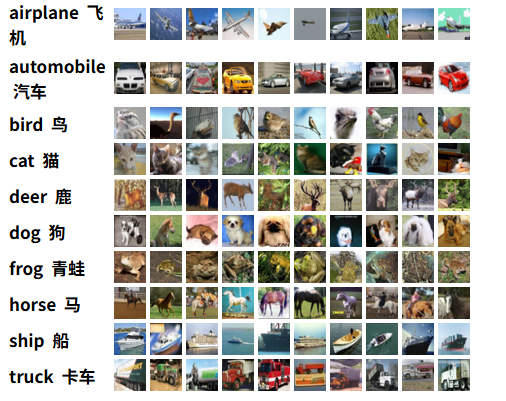

这些分类是完全相互排斥的。汽车和卡车之间没有重叠。“汽车”包括轿车、SUV 等。“卡车”只包括大卡车。两者都不包括皮卡车。

图像分类是计算机视觉中最基础的任务之一，其目标是让计算机能够识别图像中的主要内容并将其归类到预定义的类别中。例如，识别一张图片中是猫还是狗。

深度学习模型，特别是卷积神经网络(CNN)，已成为图像分类任务的主流解决方案。PyTorch作为深度学习框架，提供了构建和训练CNN模型的完整工具链。

一个完整的图像分类项目通常包含以下步骤：
1. 数据准备与预处理
2. 模型构建
3. 模型训练
4. 模型评估
5. 模型应用

In [9]:
# 1.  数据准备与预处理
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='CIFAR10_data', train=True, download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='CIFAR10_data', train=False, download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# 定义类别名称
classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

In [13]:
# 2. 构建卷积神经网络模型
# 一个典型的CNN包含卷积层、池化层和全连接层。
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 卷积层1：输入3通道(RGB)，输出6通道，5x5卷积核
        self.conv1 = nn.Conv2d(3, 6, 5)
        # 池化层：2x2窗口，步长2
        self.pool = nn.MaxPool2d(2, 2)
        # 卷积层2：输入6通道，输出16通道，5x5卷积核
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 全连接层1：输入16*5*5，输出120
        self.fc1 = nn.Linear(16*5*5, 120)
        # 全连接层2：输入120，输出84
        self.fc2 = nn. Linear(120, 84)
        # 全连接层3：输入84，输出10(对应10个类别)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 第一层卷积+ReLU+池化
        x = self.pool(F.relu(self.conv1(x)))
        # 第二层卷积+ReLU+池化
        x = self.pool(F.relu(self.conv2(x)))
        # 展平特征图
        x = x.view(-1, 16*5*5)
        # 全连接层+ReLU
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # 输出层
        x = self.fc3(x)
        return x


 
        

In [15]:
print(Net())

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [17]:
# 实例化网络
net = Net()

In [19]:
# 定义损失函数和优化器
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)

In [23]:
# Training Loop
for epoch in range(10):  #训练10个epoch
    runing_loss = 0
    for i, data in enumerate(train_dataloader, 0):
        #获取输入数据
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印统计信息
        runing_loss += loss.item()
        if i % 2000 == 1999: # 每2000个mini-batch打印一次
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {runing_loss / 2000:.3f}')
            runing_loss = 0.0
print('Finished Training!!!')

[1,  2000] loss: 1.922
[1,  4000] loss: 1.707
[1,  6000] loss: 1.617
[1,  8000] loss: 1.538
[1, 10000] loss: 1.457
[1, 12000] loss: 1.433
[2,  2000] loss: 1.362
[2,  4000] loss: 1.333
[2,  6000] loss: 1.327
[2,  8000] loss: 1.281
[2, 10000] loss: 1.283
[2, 12000] loss: 1.272
[3,  2000] loss: 1.197
[3,  4000] loss: 1.197
[3,  6000] loss: 1.167
[3,  8000] loss: 1.169
[3, 10000] loss: 1.174
[3, 12000] loss: 1.147
[4,  2000] loss: 1.086
[4,  4000] loss: 1.079
[4,  6000] loss: 1.108
[4,  8000] loss: 1.104
[4, 10000] loss: 1.093
[4, 12000] loss: 1.088
[5,  2000] loss: 1.004
[5,  4000] loss: 1.005
[5,  6000] loss: 1.045
[5,  8000] loss: 1.031
[5, 10000] loss: 1.026
[5, 12000] loss: 1.035
[6,  2000] loss: 0.930
[6,  4000] loss: 0.971
[6,  6000] loss: 0.988
[6,  8000] loss: 0.980
[6, 10000] loss: 0.966
[6, 12000] loss: 0.996
[7,  2000] loss: 0.886
[7,  4000] loss: 0.929
[7,  6000] loss: 0.906
[7,  8000] loss: 0.955
[7, 10000] loss: 0.950
[7, 12000] loss: 0.942
[8,  2000] loss: 0.834
[8,  4000] 

In [27]:
# 测试集准确率计算
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test images: {100 * correct / total:.2f}%')

Accuracy on test images: 61.56%


In [33]:
# 各个类别准确率分析
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print(f'Accuracy of {classes[i]:5s}: {100 * class_correct[i] / class_total[i]:.2f}%')

Accuracy of plane: 71.80%
Accuracy of car  : 70.80%
Accuracy of bird : 46.10%
Accuracy of cat  : 52.90%
Accuracy of deer : 54.10%
Accuracy of dog  : 34.00%
Accuracy of frog : 78.40%
Accuracy of horse: 70.70%
Accuracy of ship : 71.60%
Accuracy of truck: 65.20%


In [35]:
# 保存模型参数
PATH = './cifar_10_net'
torch.save(net.state_dict(), PATH)

In [41]:
# 加载模型进行预测
net = Net()
net.load_state_dict(torch.load(PATH))

#使用模型进行预测
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  frog  dog   car   horse
